In [1]:
# Setting Up Dependencies
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
import gmaps
from config import api_key
from config import w_key
import numpy as np

gkey = api_key
gmaps.configure(api_key=gkey)

In [2]:
# Generating random Brewery IDs

brewery_id = []

for x in range(100):
    brewery_id.append(np.random.randint(0, 6000))

    brewery_id

unique_brewery = pd.DataFrame({"ID" : brewery_id})

unique_id = list(unique_brewery["ID"].unique())

print(f"Generated {len(unique_id)} unique Brewery IDs.")

Generated 100 unique Brewery IDs.


In [3]:
# Retrieving Raw Brewery Data
raw_brewery_data = []
start = time.time()
for x in range(len(unique_id)):
    try:
        url = "https://api.openbrewerydb.org/breweries/" + str(unique_id[x])
        response = requests.get(url).json()
        raw_brewery_data.append(response)
        print(f"({x+1}/{len(unique_id)}) Retrieved Brewery ID {unique_id[x]}...")

    except:
        print(f"({x+1}/{len(unique_id)}) Timeout for Brewery ID {unique_id[x]}... skipping")
        
stop = time.time()
time_elapsed = round((stop - start)/60,2)
print(f"\nRetrieved {len(unique_id)} breweries... Time elapsed: {time_elapsed} minutes.")

(1/100) Retrieved Brewery ID 1620...
(2/100) Retrieved Brewery ID 3329...
(3/100) Retrieved Brewery ID 3318...
(4/100) Retrieved Brewery ID 2829...
(5/100) Retrieved Brewery ID 3395...
(6/100) Retrieved Brewery ID 4105...
(7/100) Retrieved Brewery ID 3234...
(8/100) Retrieved Brewery ID 1479...
(9/100) Retrieved Brewery ID 2586...
(10/100) Retrieved Brewery ID 4443...
(11/100) Retrieved Brewery ID 241...
(12/100) Retrieved Brewery ID 3348...
(13/100) Retrieved Brewery ID 849...
(14/100) Retrieved Brewery ID 2830...
(15/100) Retrieved Brewery ID 2949...
(16/100) Retrieved Brewery ID 2611...
(17/100) Retrieved Brewery ID 5416...
(18/100) Retrieved Brewery ID 5373...
(19/100) Retrieved Brewery ID 5836...
(20/100) Retrieved Brewery ID 1335...
(21/100) Retrieved Brewery ID 2367...
(22/100) Retrieved Brewery ID 716...
(23/100) Retrieved Brewery ID 2494...
(24/100) Retrieved Brewery ID 3739...
(25/100) Retrieved Brewery ID 2373...
(26/100) Retrieved Brewery ID 2903...
(27/100) Retrieved Brewe

In [4]:
# Creating DataFrame
brewery_df = pd.DataFrame(raw_brewery_data)
brewery_df.to_csv("raw_brewery_data.csv")
brewery_df.head()

,brewery_type,city,country,id,latitude,longitude,name,phone,postal_code,state,street,updated_at,website_url
0,planning,Denver,United States,1620,None,None,Westbound and Down,7205023121,80204,Colorado,,2018-08-11T21:36:44.380Z,
1,brewpub,Oak Bluffs,United States,3329,41.4548832424099,-70.5579095857058,Offshore Ale Co,5086932626,02557,Massachusetts,30 Kennebec Ave,2018-08-24T00:41:37.670Z,http://www.offshoreale.com
2,micro,Chelsea,United States,3318,42.3915659,-71.0445104,Mystic Brewery,,02150-3804,Massachusetts,174 Williams St,2018-08-24T00:41:33.582Z,
3,planning,Quinter,United States,2829,None,None,Center Pivot,7857548344,67752,Kansas,,2018-08-11T21:37:25.625Z,
4,brewpub,Ann Arbor,United States,3395,42.2804102857143,-83.7482247142857,Arbor Brewing Co,7342131393,48104-1905,Michigan,114 E Washington St,2018-08-24T00:42:03.795Z,http://www.arborbrewing.com


In [5]:
# Drop rows with "None" Lats/Lngs
brewery_df = brewery_df[brewery_df.latitude.str.contains("None") == False]
print(f"Dropped {len(unique_id) - len(brewery_df)} breweries from DataFrame which did not have coordinates.\nTotal Brewery count: {len(brewery_df)}") 
      

Dropped 41 breweries from DataFrame which did not have coordinates.
Total Brewery count: 59


In [6]:
brewery_loc = brewery_df[['latitude','longitude']].astype(float)
brewery_loc.head()

,latitude,longitude
1,41.454883,-70.557910
2,42.391566,-71.044510
4,42.280410,-83.748225
6,42.405551,-71.066340
7,40.224513,-105.267693


In [7]:
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(brewery_loc, dissipating=False, max_intensity=10, point_radius=1)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [8]:
#Grabbing list of breweries from brewery_df
brewery_names = brewery_df['name'].tolist()
brewery_cities = brewery_df['city'].tolist()

In [9]:
#Grabbing weather info for cities
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={w_key}&units={units}&q="
temps=[]
x=0
for city in brewery_cities:
    x=x+1
    city_dic = {'name':'','temp':''}
    response = requests.get(query_url + city).json()
    
    if (response['cod'] != "404" and response['cod'] != "500"):      
        city_dic['name'] = response['name']
        city_dic['temp'] = response['main']['temp_max']
        temps.append(city_dic)
        print(f"({x}/{len(brewery_cities)}) {city} weather data found...")
    else:
        print(f"({x}/{len(brewery_cities)}) {city} not found... skipping")
    

(1/59) Oak Bluffs weather data found...
(2/59) Chelsea weather data found...
(3/59) Ann Arbor weather data found...
(4/59) Everett weather data found...
(5/59) Lyons weather data found...
(6/59) Flemington weather data found...
(7/59) Eureka Springs weather data found...
(8/59) Hampden weather data found...
(9/59) Sacramento weather data found...
(10/59) Wichita weather data found...
(11/59) Shreveport weather data found...
(12/59) Portland weather data found...
(13/59) Decatur weather data found...
(14/59) Homewood weather data found...
(15/59) Allendale weather data found...
(16/59) Downers Grove weather data found...
(17/59) Louisville weather data found...
(18/59) Westborough weather data found...
(19/59) Clive weather data found...
(20/59) Manhattan weather data found...
(21/59) Woodbury weather data found...
(22/59) Kailua Kona not found... skipping
(23/59) Morrisville weather data found...
(24/59) Guntersville weather data found...
(25/59) Cloverdale weather data found...
(26/59

In [10]:
#Turn weather info into dataframe
temp_df = pd.DataFrame(temps)
temp_df = temp_df.rename(columns = {'name':'city'})
temp_df

,city,temp
0,Oak Bluffs,60.08
1,Chelsea,60.08
2,Ann Arbor,78.98
3,Everett,57.02
4,Lyons,82.94
5,Flemington,80.96
6,Eureka Springs,80.60
7,Hampden,51.63
8,Sacramento,86.00
9,Wichita,62.96


In [11]:
#Grabbing Brewery info
#base url for google places
base_url2 = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json"
ratings=[]
bad_names = []
zero_rating = []
x = 0
for name in brewery_names:
    x = x+1
    rat_dic = {'name': name,'rating':''}
    params = {'input': name, 'inputtype': 'textquery',
          'fields':'rating', 'key': api_key }
    response = requests.get(base_url2, params=params).json()
    
    try:
        if response['candidates'][0]['rating'] != 0.0:
            rat_dic['rating'] = response['candidates'][0]['rating']
            ratings.append(rat_dic)
            print(f"({x}/{len(brewery_names)}) Found rating for {name}...")
        else:
            print(f"({x}/{len(brewery_names)}) Zero rating for {name}...")      
            zero_rating.append(name)  
            
    except:
        #creating a list of names that don't return anything 
        print(f"({x}/{len(brewery_names)}) Could not find rating for {name}...") 
        bad_names.append(name)
        

(1/59) Found rating for Offshore Ale Co...
(2/59) Found rating for Mystic Brewery...
(3/59) Could not find rating for Arbor Brewing Co...
(4/59) Found rating for Bone Up Brewing Co....
(5/59) Found rating for Oskar Blues Brewery - Lyons...
(6/59) Found rating for Lone Eagle Brewing...
(7/59) Could not find rating for Gotahold Brewing Company...
(8/59) Found rating for Scantic River Brewery...
(9/59) Found rating for New Helvetia Brewing Company...
(10/59) Found rating for Central Standard Brewing...
(11/59) Could not find rating for Great Raft Brewing...
(12/59) Found rating for LABrewatory...
(13/59) Found rating for Door 4 Brewing Co...
(14/59) Found rating for Rabid Brewing, LLC...
(15/59) Found rating for Trail Point Brewing Co....
(16/59) Found rating for Emmett's Brewing Co - Downers Grove...
(17/59) Found rating for Holsopple Brewing...
(18/59) Found rating for Owen OLearys Restaurant and Brewery...
(19/59) Found rating for 515 Brewing Co...
(20/59) Could not find rating for Tal

In [12]:
ratings_df = pd.DataFrame(ratings)
ratings_df

,name,rating
0,Offshore Ale Co,4.5
1,Mystic Brewery,4.6
2,Bone Up Brewing Co.,4.6
3,Oskar Blues Brewery - Lyons,4.1
4,Lone Eagle Brewing,4.7
5,Scantic River Brewery,3.0
6,New Helvetia Brewing Company,4.5
7,Central Standard Brewing,4.8
8,LABrewatory,4.7
9,Door 4 Brewing Co,4.8


In [13]:
#Merging Data Frames
brewery_and_temp = brewery_df.merge(temp_df, how = 'outer', on = 'city') 
# brewery_and_temp
brewery_and_temp1 = brewery_and_temp[['brewery_type','city','name','temp', 'state']]
brewery_temp_rating = brewery_and_temp1.merge(ratings_df, how = 'outer', on = 'name')
dataset_clean = brewery_temp_rating.dropna(how = 'any')
# dataset_clean
dataset_clean1 = dataset_clean.drop_duplicates('name')
dataset_clean2 = dataset_clean1.set_index('name')
dataset_clean2

,brewery_type,city,temp,state,rating
name,,,,,
Offshore Ale Co,brewpub,Oak Bluffs,60.08,Massachusetts,4.5
Mystic Brewery,micro,Chelsea,60.08,Massachusetts,4.6
Bone Up Brewing Co.,micro,Everett,57.02,Massachusetts,4.6
Oskar Blues Brewery - Lyons,brewpub,Lyons,82.94,Colorado,4.1
Lone Eagle Brewing,brewpub,Flemington,80.96,New Jersey,4.7
Scantic River Brewery,micro,Hampden,51.63,Massachusetts,3.0
New Helvetia Brewing Company,micro,Sacramento,86.00,California,4.5
Central Standard Brewing,micro,Wichita,62.96,Kansas,4.8
LABrewatory,micro,Portland,62.06,Oregon,4.7


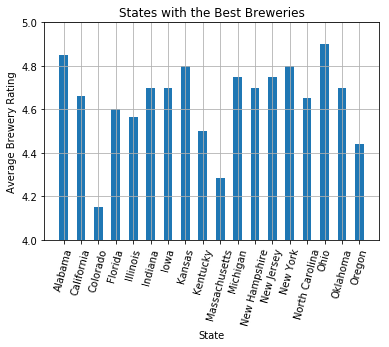

In [14]:
# Group DataFrame by State
group_by_state = dataset_clean2.groupby('state')

# Plot Average Rating By State
plt.bar(np.arange(0,len(group_by_state),1),height = group_by_state['rating'].mean(), tick_label = group_by_state['rating'].mean().index, width = 0.5)
plt.grid()
plt.title("States with the Best Breweries")
plt.xlabel("State")
plt.ylabel("Average Brewery Rating")
plt.xticks(rotation = 75)
plt.ylim(4,5)
plt.savefig("Average Brewery Rating vs State")


Text(0,0.5,'Rating')

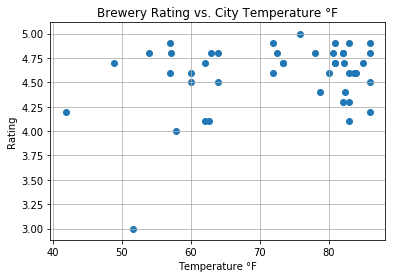

In [20]:
#Importing Stats
from scipy.stats import linregress
#Making Temp vs. Rating Scatter plot
plt.scatter(dataset_clean2['temp'], dataset_clean2['rating'])
plt.grid()
plt.title('Brewery Rating vs. City Temperature °F')
plt.xlabel('Temperature °F')
plt.ylabel('Rating')

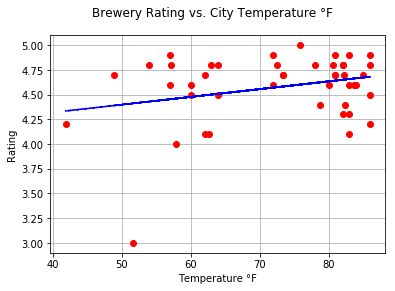

The slope of the line of best fit is 0.007863766818721406
The correlation coefficient is 0.2747090249805626


In [30]:
#Importing Stats
from scipy.stats import linregress

#Making Line of Best Fit
(slope, intercept, _, _, _) = linregress(dataset_clean2['temp'], dataset_clean2['rating'])
fit = slope * dataset_clean2['temp'] + intercept

#Making plot
fig, ax = plt.subplots()
fig.suptitle("Brewery Rating vs. City Temperature °F", fontsize=12)

ax.set_xlabel("Temperature °F")
ax.set_ylabel("Rating")
corr_coef = np.corrcoef(dataset_clean2['temp'], dataset_clean2['rating'])[0, 1]
ax.plot(dataset_clean2['temp'], dataset_clean2['rating'], color = 'red', linewidth=0, marker='o')
ax.plot(dataset_clean2['temp'], fit, 'b--')
plt.grid()
plt.show()

print('The slope of the line of best fit is ' + str(slope))
print(f'The correlation coefficient is {corr_coef}')